# Image Multi Class Classification 


#### Import Library

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

#### Exploratory Data Analysis

In [2]:
base_dir = '../input/ecommerce-products-image-dataset/ecommerce products'
print(os.listdir(base_dir))

['sofa', 'tv', 'jeans', 'tshirt']


> There are 4 type of product (class)

In [3]:
jeans_dir = os.path.join(base_dir, 'jeans')
sofa_dir = os.path.join(base_dir, 'sofa')
tshirt_dir = os.path.join(base_dir, 'tshirt')
tv_dir = os.path.join(base_dir, 'tv')

jeans_fnames = os.listdir(jeans_dir)
sofa_fnames = os.listdir(sofa_dir)
tshirt_fnames = os.listdir(tshirt_dir)
tv_fnames = os.listdir(tv_dir)
print("count jeans :",len(jeans_fnames))
print("count sofa :",len(sofa_fnames))
print("count tshirt :",len(tshirt_fnames))
print("count tv :",len(tv_fnames))

count jeans : 199
count sofa : 199
count tshirt : 199
count tv : 199


> Data already balanced for every class

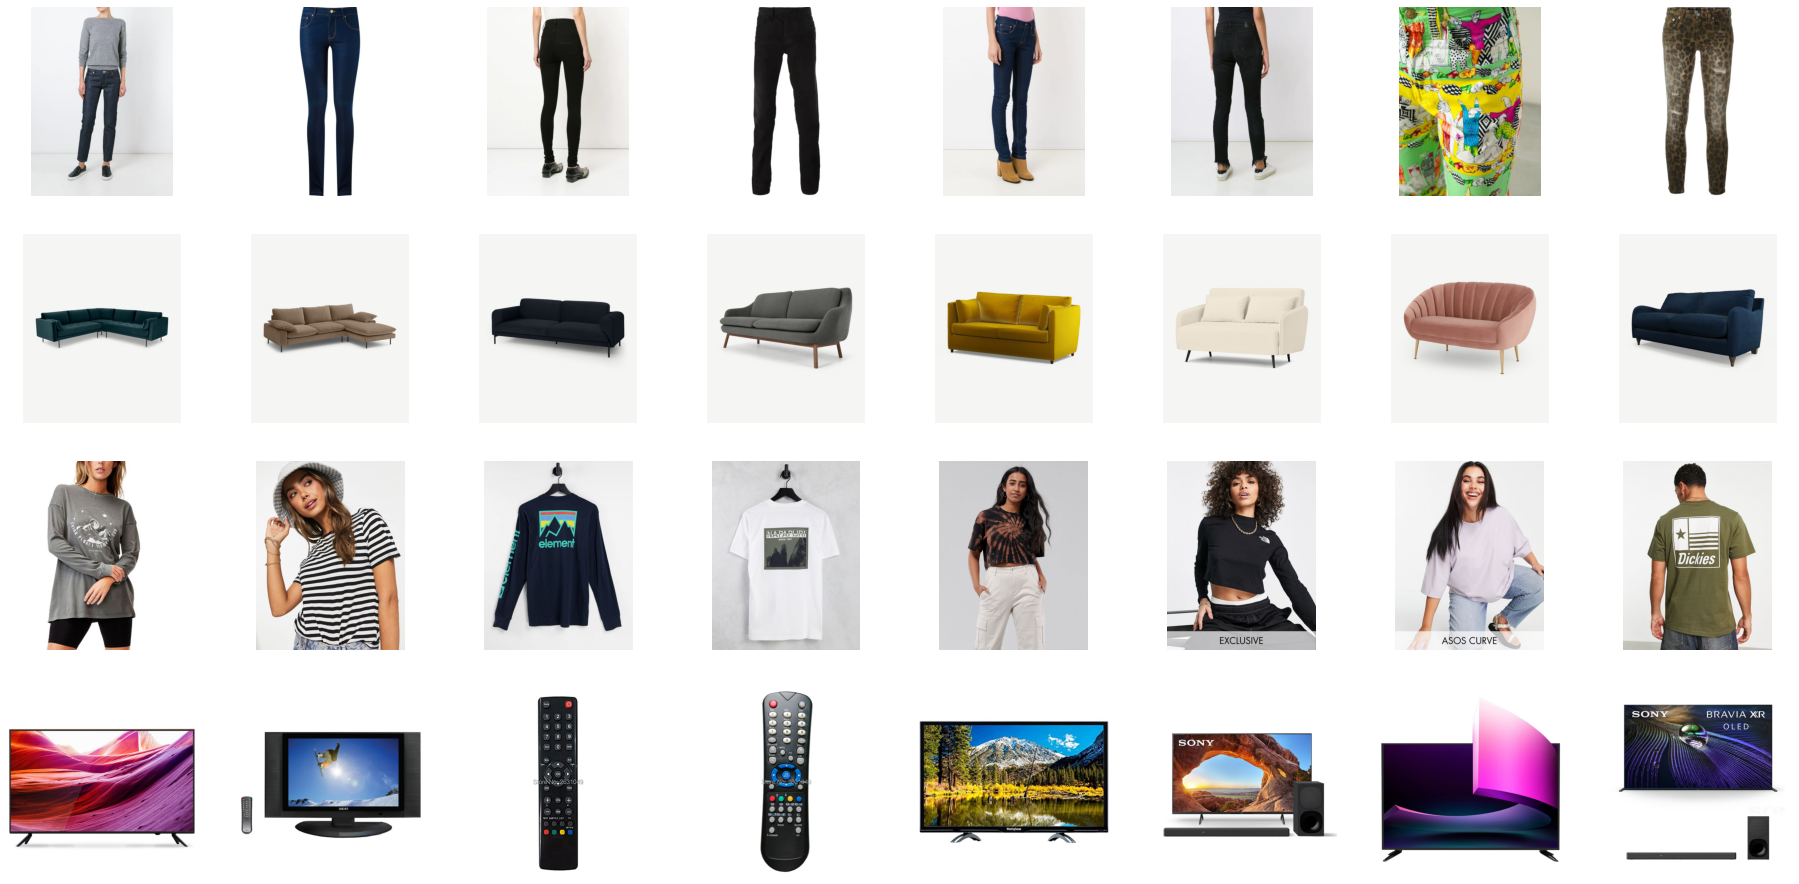

In [4]:
nrows = 4
ncols = 8
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_jeans_pix = [os.path.join(jeans_dir, fname) 
                for fname in jeans_fnames[ pic_index-8:pic_index] 
               ]

next_sofa_pix = [os.path.join(sofa_dir, fname) 
                for fname in sofa_fnames[ pic_index-8:pic_index]
               ]

next_tshirt_pix = [os.path.join(tshirt_dir, fname) 
                for fname in tshirt_fnames[ pic_index-8:pic_index]
               ]

next_tv_pix = [os.path.join(tv_dir, fname) 
                for fname in tv_fnames[ pic_index-8:pic_index]
               ]


for i, img_path in enumerate(next_jeans_pix+next_sofa_pix+next_tshirt_pix+next_tv_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

> We can see that in tv dataset, there are some noise data, so we must remove that noise

#### Data Preprocessing
I remove the noise in dataset manually, and this is the result

In [5]:
base_dir_cleaned ='../input/ecommerceproductcleaned/ecommerce products_cleaned'

In [6]:
tv_dir_cleaned = os.path.join(base_dir_cleaned, 'tv')
tv_fnames_cleaned = os.listdir(tv_dir_cleaned)
print("count tv :",len(tv_fnames_cleaned))

count tv : 146


> there is still 146 / 199 (original data)

#### Split Data

In [7]:
img_height = 150
img_width = 150
batch_size = 50

datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = datagen.flow_from_directory(
    base_dir_cleaned,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = datagen.flow_from_directory(
    base_dir_cleaned, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 597 images belonging to 4 classes.
Found 146 images belonging to 4 classes.


#### Build Model

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(4, activation='softmax')  
])

2022-06-14 19:47:54.963461: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

In [10]:
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [11]:
history = model.fit(
            train_generator,
            epochs=15,
            validation_data=validation_generator,
            verbose=2
            )

2022-06-14 19:47:56.588671: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
12/12 - 20s - loss: 1.2102 - accuracy: 0.5243 - val_loss: 0.9279 - val_accuracy: 0.5959
Epoch 2/15
12/12 - 15s - loss: 0.5395 - accuracy: 0.8090 - val_loss: 0.3104 - val_accuracy: 0.9178
Epoch 3/15
12/12 - 15s - loss: 0.4152 - accuracy: 0.8476 - val_loss: 0.4917 - val_accuracy: 0.8151
Epoch 4/15
12/12 - 16s - loss: 0.3760 - accuracy: 0.8777 - val_loss: 0.1997 - val_accuracy: 0.9658
Epoch 5/15
12/12 - 17s - loss: 0.2857 - accuracy: 0.9162 - val_loss: 0.1403 - val_accuracy: 0.9658
Epoch 6/15
12/12 - 16s - loss: 0.2072 - accuracy: 0.9447 - val_loss: 0.2888 - val_accuracy: 0.8973
Epoch 7/15
12/12 - 15s - loss: 0.2344 - accuracy: 0.9246 - val_loss: 0.1797 - val_accuracy: 0.9452
Epoch 8/15
12/12 - 16s - loss: 0.1949 - accuracy: 0.9313 - val_loss: 0.3100 - val_accuracy: 0.9041
Epoch 9/15
12/12 - 16s - loss: 0.2031 - accuracy: 0.9330 - val_loss: 0.1306 - val_accuracy: 0.9521
Epoch 10/15
12/12 - 15s - loss: 0.1409 - accuracy: 0.9497 - val_loss: 0.1371 - val_accuracy: 0.9589
Epoch 11/

> We got the final result for model is having training accuracy and val accuracy greater than 96%

#### Model Evaluation

Text(0.5, 1.0, 'Training and validation loss')

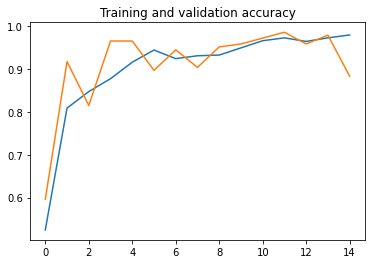

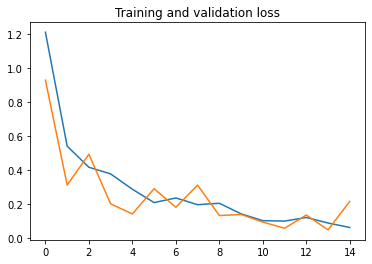

In [12]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc))

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

> From the graph , we can see the accuracy and loss of the model already quite balanced